**1. Import and Prepare Dataset**

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from string import ascii_letters
from scipy.stats import pearsonr
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from matplotlib.pyplot import figure
import matplotlib.dates as md

In [225]:
b = pd.read_csv("Match Dataset.csv")
a=b.copy()
a

,Winner,Result,Margin,BR,Match,Ground,Start Date,Covid
0,Pakistan,won,7 wickets,77.0,ODI : Bangladesh v Pakistan,Moratuwa,31-Mar-86,0
1,Sri Lanka,won,7 wickets,81.0,ODI : Sri Lanka v Bangladesh,Kandy,2-Apr-86,0
2,India,won,9 wickets,114.0,ODI : Bangladesh v India,Chattogram,27-Oct-88,0
3,Pakistan,won,173 runs,NaN,ODI : Bangladesh v Pakistan,Chattogram,29-Oct-88,0
4,Sri Lanka,won,9 wickets,85.0,ODI : Bangladesh v Sri Lanka,Dhaka,2-Nov-88,0
...,...,...,...,...,...,...,...,...
612,New Zealand,won,inns & 117 runs,NaN,Test : New Zealand v Bangladesh,Christchurch,9-Jan-22,1
613,Bangladesh,won,4 wickets,7.0,ODI : Bangladesh v Afghanistan,Chattogram,23-Feb-22,1
614,Bangladesh,won,88 runs,NaN,ODI : Bangladesh v Afghanistan,Chattogram,25-Feb-22,1
615,Afghanistan,won,7 wickets,59.0,ODI : Bangladesh v Afghanistan,Chattogram,28-Feb-22,1


In [226]:
a=b.copy()
#replace nan with -1 to indicate bowling victory
a[0:][3:].fillna( -1, inplace = True) 

#Reveal opponent team name and set match type
a['Match_Type']=a['Match']
a['Match_Type'] = a['Match_Type'].str[:4]
a['Match'] = a['Match'].str[6:]
a['Match'] = a['Match'].str.replace('Bangladesh v ', '')
a['Match'] = a['Match'].str.replace(' v Bangladesh', '')

# Discardinng test matches
a=a[(a['Match_Type'] != 'Test')]
#reset index
a.reset_index(inplace=True)
del a["index"]

#a['Win_diff'] = a['Margin'].str.replace(' wickets', '')
maxRun=[]

for index, i in enumerate(a['Margin']):
  if " wickets" in i:
    temp=float(i.replace(' wickets', ''))
    temp=temp/10;
    a["Margin"].at[index]=str(temp)
  else:
    temp=float(i.replace(' runs', ''))
    maxRun.append(temp)
max1=max(maxRun)

for index, i in enumerate(a['Margin']):
  if " runs" in i:
    temp=float(i.replace(' runs', ''))
    temp=temp/max1
    a["Margin"].at[index]=str('%.2f'%temp)

a["Win"]=""
for index, i in enumerate(a['Winner']):
  if "Bangladesh" in i:
    a["Win"].at[index]=1
  else:
    a["Win"].at[index]=0

a["Margin"]=pd.to_numeric(a["Margin"], errors='coerce')
a["Win"]=pd.to_numeric(a["Win"], errors='coerce')
before_covid=a[:459].copy()
before_covid.tail
#a['Margin'] = a['Margin'].str.replace(' runs', '')

<bound method NDFrame.tail of          Winner Result  Margin     BR      Match      Ground Start Date  \
0      Pakistan    won    0.70   77.0   Pakistan    Moratuwa  31-Mar-86   
1     Sri Lanka    won    0.70   81.0  Sri Lanka       Kandy   2-Apr-86   
2         India    won    0.90  114.0      India  Chattogram  27-Oct-88   
3      Pakistan    won    0.74   -1.0   Pakistan  Chattogram  29-Oct-88   
4     Sri Lanka    won    0.90   85.0  Sri Lanka       Dhaka   2-Nov-88   
..          ...    ...     ...    ...        ...         ...        ...   
454       India    won    0.80   26.0      India      Rajkot   7-Nov-19   
455       India    won    0.13   -1.0      India      Nagpur  10-Nov-19   
456    Pakistan    won    0.50    3.0   Pakistan      Lahore  24-Jan-20   
457    Pakistan    won    0.90   20.0   Pakistan      Lahore  25-Jan-20   
458  Bangladesh    won    0.73   -1.0   Zimbabwe      Sylhet   1-Mar-20   

     Covid Match_Type  Win  
0        0       ODI     0  
1        0 

In [227]:
unique_values = pd.unique(b[["Winner"]].values.ravel())
unique_values

array(['Pakistan', 'Sri Lanka', 'India', 'New Zealand', 'Australia',
       'Kenya', 'Zimbabwe', 'Bangladesh', 'West Indies', 'England',
       'South Africa', 'Canada', 'Ireland', 'Netherlands', 'Scotland',
       'Afghanistan', 'Hong Kong'], dtype=object)

In [228]:
#reset index
def reset(a):
  a.reset_index(inplace=True)
  del a["index"]
reset(a)

In [229]:
#Label Encode
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

a['Winner']=le.fit_transform(a['Winner'])
a['Ground']=le.fit_transform(a['Ground'])

a

,Winner,Result,Margin,BR,Match,Ground,Start Date,Covid,Match_Type,Win
0,11,won,0.70,77.0,Pakistan,65,31-Mar-86,0,ODI,0
1,14,won,0.70,81.0,Sri Lanka,51,2-Apr-86,0,ODI,0
2,6,won,0.90,114.0,India,20,27-Oct-88,0,ODI,0
3,11,won,0.74,-1.0,Pakistan,20,29-Oct-88,0,ODI,0
4,14,won,0.90,85.0,Sri Lanka,32,2-Nov-88,0,ODI,0
...,...,...,...,...,...,...,...,...,...,...
501,11,won,0.50,0.0,Pakistan,63,22-Nov-21,1,T20I,0
502,2,won,0.40,7.0,Afghanistan,20,23-Feb-22,1,ODI,1
503,2,won,0.38,-1.0,Afghanistan,20,25-Feb-22,1,ODI,1
504,0,won,0.70,59.0,Afghanistan,20,28-Feb-22,1,ODI,0


**2. Classification Models**


In [272]:
from sklearn.model_selection import train_test_split

feature_cols = ['Winner', 'Margin', 'Ground']
X=a[feature_cols]
y=a.Win

graph=[]

# import the metrics class
from sklearn import metrics
def plot(name, y_test, y_pred):
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  cnf_matrix

  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))

  graph.append((name, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)))



> 1. Logistic Regression





Accuracy: 0.9212598425196851
Precision: 0.7959183673469388
Recall: 1.0


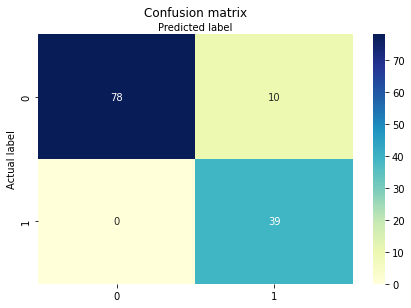

In [273]:

from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
plot("Logistic Regression", y_test, y_pred)



> 2. Naïve Bayes





Accuracy: 1.0
Precision: 1.0
Recall: 1.0


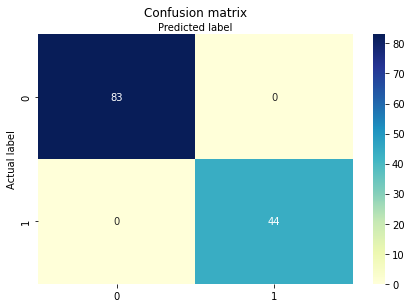

In [274]:

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

plot("Naïve Bayes", y_test, y_pred)



> 3. K-Nearest Neighbours



Accuracy: 0.952755905511811
Precision: 0.8918918918918919
Recall: 0.9428571428571428


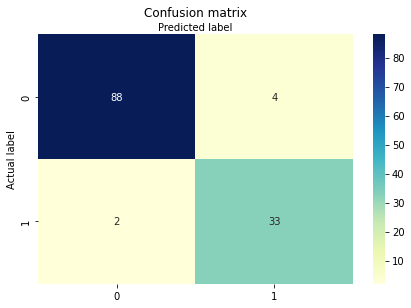

In [275]:

from sklearn.neighbors import KNeighborsClassifier

# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=109)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
plot("K-Nearest Neighbours", y_test, y_pred)



> 4. Support Vector Machine



Accuracy: 0.9133858267716536
Precision: 0.7608695652173914
Recall: 1.0


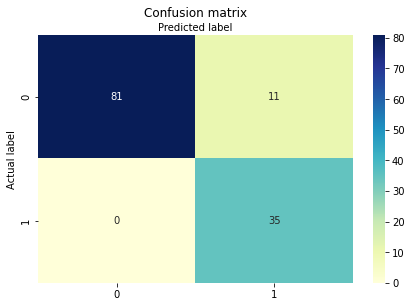

In [276]:

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=109)
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
plot("Support Vector Machine", y_test, y_pred)



> 5. Random Forest



Accuracy: 0.993421052631579
Precision: 0.9811320754716981
Recall: 1.0


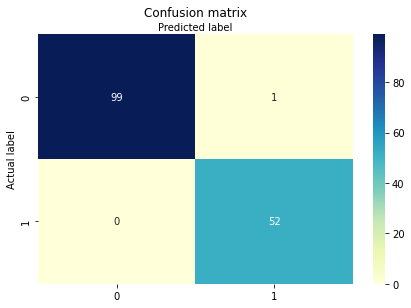

In [277]:

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

plot("Random Forest", y_test, y_pred)

In [222]:
c=a[0:1].copy()
c["Winner"]=int(input("Enter Country Code:"))
c["Margin"]=float(input("Enter Margin:"))
c["Ground"]=float(input("Enter Ground:"))


Enter Country Code:11
Enter Margin:.5
Enter Ground:11


In [278]:
graph

[('Logistic Regression', 0.9212598425196851, 0.7959183673469388, 1.0),
 ('Naïve Bayes', 1.0, 1.0, 1.0),
 ('K-Nearest Neighbours',
  0.952755905511811,
  0.8918918918918919,
  0.9428571428571428),
 ('Support Vector Machine', 0.9133858267716536, 0.7608695652173914, 1.0),
 ('Random Forest', 0.993421052631579, 0.9811320754716981, 1.0)]